In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [22]:
class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :

        self.learning_rate = learning_rate

        self.iterations = iterations


    def fit( self, X, Y ) :

        self.m, self.n = X.shape

        self.W = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y



        for i in range( self.iterations ) :

            self.update_weights()

        return self


    def update_weights( self ) :

        Y_pred = self.predict( self.X )


        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m


        self.W = self.W - self.learning_rate * dW

        self.b = self.b - self.learning_rate * db

        return self


    def predict( self, X ) :

        return X.dot( self.W ) + self.b

In [23]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [25]:
df = df.dropna()

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


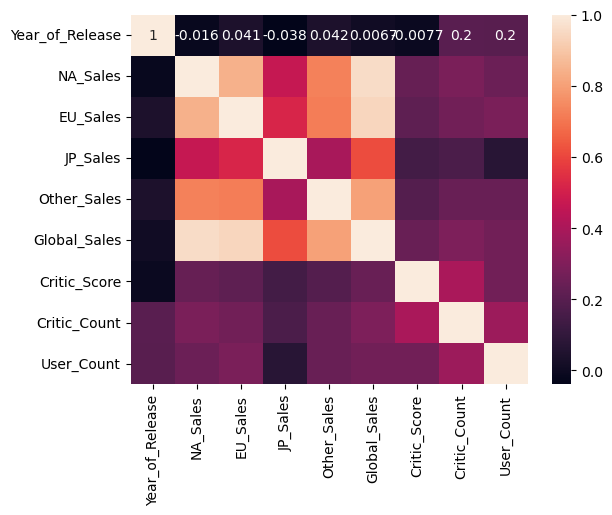

In [26]:

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True)

plt.show()


In [31]:


X = df[['Critic_Score', 'Critic_Count', 'User_Count']]
Y = df['Global_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(
      X_scaled, Y, test_size = 1/3, random_state = 0 )


model = LinearRegression( iterations = 1000, learning_rate = 0.01 )
model.fit( X_train, Y_train )

Y_pred = model.predict( X_test )
print( "Predicted values ", np.round( Y_pred[:3], 2 ) )
print( "Real values      ", Y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

mse = np.mean((Y_test - Y_pred) ** 2)

print("Mean Squared Error: ", mse)



Predicted values  [0.98 1.72 0.83]
Real values       1887    1.09
5439    0.33
6796    0.24
Name: Global_Sales, dtype: float64
Trained W         0.22
Trained b         0.76
Mean Squared Error:  3.1506097478466537


In [34]:
X = df[['Critic_Score', 'Critic_Count', 'User_Count']]
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'The Mean Squared Error (MSE) on test set: {mse}')


The Mean Squared Error (MSE) on test set: 4.2685489791389255


From observing the MSE scores, we can conclude that Linear Regression is the best model for this dataset compared to Decision Tree.